<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [9]:
# Your code here
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Download the webpage at the url


In [3]:
#your code goes here
data = requests.get(url).text

Create a soup object


In [4]:
#your code goes here
soup = BeautifulSoup(data,"html.parser")

Scrape the `Language name` and `annual average salary`.


In [5]:
#your code goes here
table = soup.find('table')
print(table)

<table>
<tbody>
<tr>
<td>No.</td>
<td>Language</td>
<td>Created By</td>
<td>Average Annual Salary</td>
<td>Learning Difficulty</td>
</tr>
<tr>
<td>1</td>
<td>Python</td>
<td>Guido van Rossum</td>
<td>$114,383</td>
<td>Easy</td>
</tr>
<tr>
<td>2</td>
<td>Java</td>
<td>James Gosling</td>
<td>$101,013</td>
<td>Easy</td>
</tr>
<tr>
<td>3</td>
<td>R</td>
<td>Robert Gentleman, Ross Ihaka</td>
<td>$92,037</td>
<td>Hard</td>
</tr>
<tr>
<td>4</td>
<td>Javascript</td>
<td>Netscape</td>
<td>$110,981</td>
<td>Easy</td>
</tr>
<tr>
<td>5</td>
<td>Swift</td>
<td>Apple</td>
<td>$130,801</td>
<td>Easy</td>
</tr>
<tr>
<td>6</td>
<td>C++</td>
<td>Bjarne Stroustrup</td>
<td>$113,865</td>
<td>Hard</td>
</tr>
<tr>
<td>7</td>
<td>C#</td>
<td>Microsoft</td>
<td>$88,726</td>
<td>Hard</td>
</tr>
<tr>
<td>8</td>
<td>PHP</td>
<td>Rasmus Lerdorf</td>
<td>$84,727</td>
<td>Easy</td>
</tr>
<tr>
<td>9</td>
<td>SQL</td>
<td>Donald D. Chamberlin, Raymond F. Boyce.</td>
<td>$84,793</td>
<td>Easy</td>
</tr>
<tr>
<td>10</t

Save the scrapped data into a file named *popular-languages.csv*


In [17]:
# your code goes here
popular_language=[]
for row in soup.find_all('tr'):
    cols = row.find_all('td')
    name = cols[1].getText()
    salary = cols[3].getText().translate({ord(i): None for i in '$,'})
    print("{}--->{}".format(name,salary))
    popular_lan=[name,salary]
    popular_language.append(popular_lan)
    
print(popular_language)

Language--->Average Annual Salary
Python--->114383
Java--->101013
R--->92037
Javascript--->110981
Swift--->130801
C++--->113865
C#--->88726
PHP--->84727
SQL--->84793
Go--->94082
[['Language', 'Average Annual Salary'], ['Python', '114383'], ['Java', '101013'], ['R', '92037'], ['Javascript', '110981'], ['Swift', '130801'], ['C++', '113865'], ['C#', '88726'], ['PHP', '84727'], ['SQL', '84793'], ['Go', '94082']]


<Axes: title={'center': 'Relationship between Language and Average Annual Salary'}, xlabel='Language', ylabel='Average Annual salary'>

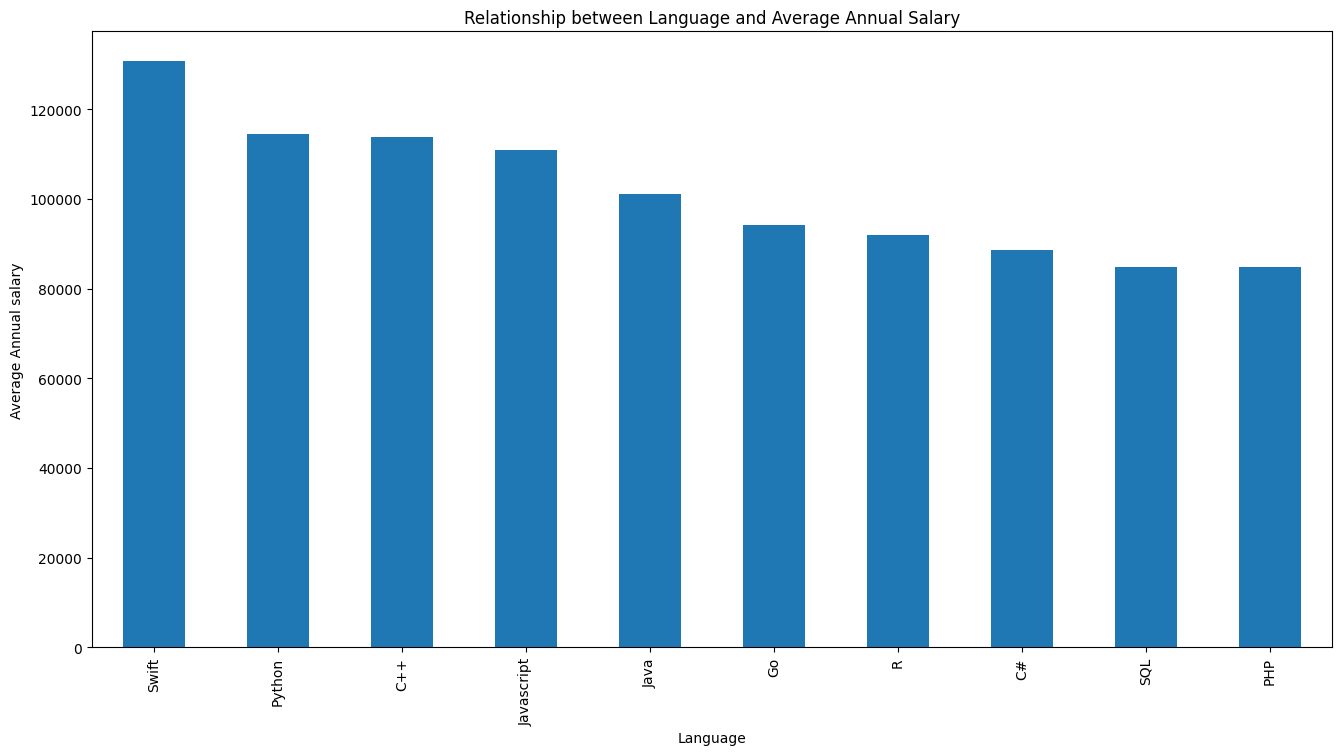

In [28]:
import csv
with open('popular-languages.csv','w',newline='') as file:
    csvwriter = csv.writer(file)
    for row in popular_language:
        csvwriter.writerow(row)
        
df = pd.read_csv('popular-languages.csv').set_index('Language').sort_values(by='Average Annual Salary', ascending=False)
df.head()

df.plot(kind='bar',title= 'Relationship between Language and Average Annual Salary', ylabel='Average Annual salary',
        legend=None, figsize=(16,8))

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
